# Text Mining Final Project
## Authors: Emma Kramer, Chuhan Peng, Yujie Fu, Zhoulin Zhuo
### <font color=green> Amazon Product Data Analysis
### <font color=blue> Objectives

1. Help the company understand customers' preferences
2. Use the keywords in product description to encourage the customers to buy the game
3. Evaluate the sentiment of customers, so that businesses can improve customer satisfaction

### <font color=blue> Methodology

1. Text Data Pre-Processing
2. Topic Modeling
3. Sentiment Analysis

# <font color=red>Step1
## Preparation

1. Import all pckages needed, and make sure packages all installed.
2. Reading data (Reference: *http://snap.stanford.edu/data/amazon/productGraph/*)

In [1]:
# Packages needed
# The module 'sys' allows istalling module from inside Jupyter 
import sys

# The module 'random' helps splitting data into training and testing
import random

!{sys.executable} -m pip install numpy
import numpy as np 

!{sys.executable} -m pip install pandas
import pandas as pd

# Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

# Text normalization function
%run ./Text_Normalization_Function.ipynb

# Affin lexicon module
!{sys.executable} -m pip install afinn
from afinn import Afinn

# Plotting package
import matplotlib.pyplot as plt

# Reading unzip json file into a panda dataframe
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

# The module "json" hepls to read json file
import json

# The module "gzip" helps to unzip data
import gzip

# Sklearn for SVM
from sklearn import linear_model
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

# Import analyzer for Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield json.dumps(eval(l))

f = open("output.strict", 'w')
for l in parse("reviews_Toys_and_Games_5.json.gz"):
    f.write(l + '\n')

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF("reviews_Toys_and_Games_5.json.gz")

Processing c:\users\13159\appdata\local\pip\cache\wheels\4f\85\2a\67a30aa6cf144eca0c159f337ce5166df2213c4cde9e699cbe\html_parser-0.2-py3-none-any.whl


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\13159\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13159\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\13159\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\13159\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\13159\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# <font color=red> Step2
## <font color=blue> Text Data Pre-Processing

1. Initialize a new colnumn indicating the sentiment of Review Text.
2. Find a products with most number of reviews
3. Normalize the text for reviews and name the normalized corpora of review texts

In [2]:
# Create a new column named "polarity" and set is as "positive" if overall rating is greater than 4.0, else set it as "negative"
temp_f = lambda x: "positive" if x > 4.0 else "negative"
df["polarity"] = pd.DataFrame(df["overall"]).applymap(temp_f)

# Find a products with most number of reviews
temp = df.groupby("asin")["reviewerID"].count()
most_reviews_prod = temp.sort_values(ascending = False).index[0]

# Define puzzel as the review of game Cards Against Humanity
puzzel = df.loc[df.asin=="B004S8F7QM",]

# Normalize review text
normalized_reviews = normalize_corpus(np.array(puzzel["reviewText"]))

#T okenization into Words
# Sample code
# whitespace_wt = nltk.WhitespaceTokenizer()
# words = whitespace_wt.tokenize()

#Bag of words
bow_vectorizer = CountVectorizer()
bow_toy_corpus = bow_vectorizer.fit_transform(normalized_reviews)
pd.DataFrame(data = bow_toy_corpus.todense(), columns = bow_vectorizer.get_feature_names())

# TF-IDF
vectorizer_TF_IDF = TfidfVectorizer(norm = 'l2', smooth_idf = True)
TF_IDF_matrix = vectorizer_TF_IDF.fit_transform(normalized_reviews).todense()
pd.DataFrame(np.round(TF_IDF_matrix,2), columns=vectorizer_TF_IDF.get_feature_names())

# # Stop words
# # Sample codes
# stop_words=set(stopwords.words("english"))
# add_stopwords ={'way','alot'}
# stop_words_new = add_stopwords.union(stop_words)
# filtered_tokens=[]
# for w in words:
#     if w not in stop_words:
#         filtered_tokens.append(w)

,10pm,1c5w1ph,1st,2am,3am,3rd,7yr,80s,90s,a2a,...,yep,yes,yet,yield,york,young,yr,yup,zesty,zone
0,0.3,0.0,0.0,0.3,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.11,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.11,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
305,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
306,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
307,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


# <font color=red> Step3
## <font color=blue> Sentiment analysis

####  Model using
1. Vader, Afinn lexicon (Unsupervised)
2. SVM (Supervised)
<br> (Finally, not considered because of limited sample size)

#### Methodology
1. Randomly split data into training and testing.
2. Fine-tune a best lexicon based sentiment analyzer
   (Due to limited sample size, Fine-tuning is meaningless because of limited sample size.)
3. classification using SVM
4. Using chart to help analyze
    
#### Objective
1. Try different models to see whether our analysis result is reliable (Business decision making should rely on trusted analysis)
2. Be ready to apply sentiment analyzer sentiment on new customers

In [3]:
# Set a random seed to ensure that we get the same result each time we run the same process
random.seed(1)

# split data into training (209 observations) and testing (100 observations)
puzzel_index = puzzel.index.tolist()
training_index = random.sample(puzzel_index, 209)
testing_index = [item for item in puzzel_index if item not in training_index]

training_puzzel = puzzel.loc[training_index]
testing_puzzel = puzzel.loc[testing_index]

##### Afinn lexicon based sentiment analyzer

In [4]:
# Afinn lexicon based sentiment analysis
afinn_sentiment_score = [ Afinn().score(testing_puzzel["reviewText"].iloc[i]) for i in range(100)]
afinn_prediction = ["positive" if i >0 else "negative" for i in afinn_sentiment_score]

In [5]:
# Afinn lexicon based sentiment analysis prediction accuracy
np.mean(afinn_prediction == testing_puzzel["polarity"])

0.81

In [6]:
# # Find a best lambda
# lambdaa_list = [i-25 for i in range(50)]
# lambdaa_list
# afinn_accuracy_list = []
# for j in lambdaa_list:
#     afinn_sentiment_score = [ Afinn().score(testing_puzzel["reviewText"].iloc[i]) for i in range(100)]
#     afinn_prediction = ["positive" if i > j else "negative" for i in afinn_sentiment_score]
#     afinn_accuracy_list.append(np.mean(afinn_prediction == testing_puzzel["polarity"]))

# afinn_accuracy_list

In [7]:
# Confusion matrix
pd.crosstab(pd.Series(testing_puzzel["polarity"].tolist()), 
            pd.Series(afinn_prediction), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,1,14,15
positive,5,80,85
All,6,94,100


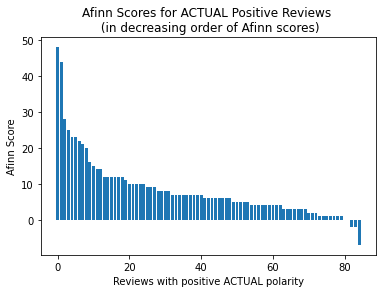

In [8]:
# Have a look at raw Afinn scores assigned to actual positive reviews
testing_puzzel_pos = testing_puzzel.loc[testing_puzzel["polarity"] == "positive"]
afinn_pos_sentiment_score = [ Afinn().score(testing_puzzel_pos["reviewText"].iloc[i]) for i in range(85)]

pos_reviews_scored_afinn = pd.Series(afinn_pos_sentiment_score)
plt.bar(range(0, 85), pos_reviews_scored_afinn.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("Afinn Score")
plt.title("Afinn Scores for ACTUAL Positive Reviews \n (in decreasing order of Afinn scores)")
plt.show()

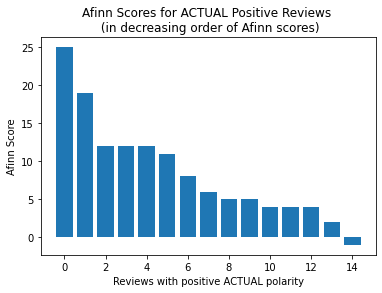

In [9]:
# Have a look at raw Afinn scores assigned to actual negative reviews
testing_puzzel_neg = testing_puzzel.loc[testing_puzzel["polarity"] == "negative"]
afinn_neg_sentiment_score = [ Afinn().score(testing_puzzel_neg["reviewText"].iloc[i]) for i in range(15)]

neg_reviews_scored_afinn = pd.Series(afinn_neg_sentiment_score)
plt.bar(range(0, 15), neg_reviews_scored_afinn.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("Afinn Score")
plt.title("Afinn Scores for ACTUAL Positive Reviews \n (in decreasing order of Afinn scores)")
plt.show()

Import the sentiment analysis function SentimentIntensityAnalyzer() that uses the VADER lexicon from the NLTK package. Let's refer to that function as analyzer for short:

##### Vader lexicon based sentiment analyzer

In [10]:
analyzer = SentimentIntensityAnalyzer()
vader_sentiment_score = [analyzer.polarity_scores(testing_puzzel["reviewText"].iloc[i]) for i in range(100)]
vader_sentiment_predictoin = ["positive" if item['compound'] > 0.1 else "negative" for item in vader_sentiment_score]
np.mean(vader_sentiment_predictoin == testing_puzzel["polarity"])

0.79

In [11]:
# Confusion matrix
pd.crosstab(pd.Series(testing_puzzel["polarity"].tolist()), 
            pd.Series(vader_sentiment_predictoin), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,0,15,15
positive,6,79,85
All,6,94,100


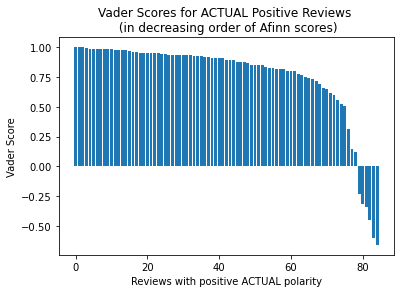

In [12]:
# Have a look at raw Vader scores assigned to actual positive reviews
testing_puzzel_pos = testing_puzzel.loc[testing_puzzel["polarity"] == "positive"]
vader_pos_sentiment_score = [analyzer.polarity_scores(testing_puzzel_pos["reviewText"].iloc[i]) for i in range(85)]
vader_pos_sentiment_score = [item['compound'] for item in vader_pos_sentiment_score]

pos_reviews_scored_vader = pd.Series(vader_pos_sentiment_score)
plt.bar(range(0, 85), pos_reviews_scored_vader.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("Vader Score")
plt.title("Vader Scores for ACTUAL Positive Reviews \n (in decreasing order of Afinn scores)")
plt.show()

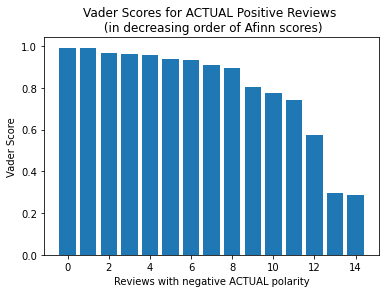

In [13]:
# Have a look at raw Vader scores assigned to actual negative reviews
testing_puzzel_neg = testing_puzzel.loc[testing_puzzel["polarity"] == "negative"]
vader_neg_sentiment_score = [analyzer.polarity_scores(testing_puzzel_neg["reviewText"].iloc[i]) for i in range(15)]
vader_neg_sentiment_score = [item['compound'] for item in vader_neg_sentiment_score]

neg_reviews_scored_vader = pd.Series(vader_neg_sentiment_score)
plt.bar(range(0, 15), neg_reviews_scored_vader.sort_values(ascending=False))
plt.xlabel("Reviews with negative ACTUAL polarity")
plt.ylabel("Vader Score")
plt.title("Vader Scores for ACTUAL Positive Reviews \n (in decreasing order of Afinn scores)")
plt.show()

##### SVM trial 

In [14]:
# Normalize the text for reviews and name the normalized corpora of review texts normalized_test_reviews and normalized_train_reviews
normalized_test_reviews = normalize_corpus(np.array(testing_puzzel["reviewText"]))
normalized_train_reviews = normalize_corpus(np.array(training_puzzel["reviewText"]))

vectorizer = TfidfVectorizer(ngram_range = (1,2)) 
feature_matrix_TRAIN = vectorizer.fit_transform(normalized_train_reviews).astype(float)

feature_matrix_TRAIN_names = vectorizer.get_feature_names() 
feature_matrix_TRAIN_table = pd.DataFrame(data = feature_matrix_TRAIN.todense(), 
                                          columns = feature_matrix_TRAIN_names)

feature_matrix_TEST = vectorizer.transform(normalized_test_reviews)



svm = linear_model.SGDClassifier(loss='hinge', random_state = 0) 
svm.fit(feature_matrix_TRAIN, np.array(training_puzzel["polarity"]))
predicted_svm = svm.predict(feature_matrix_TEST) 

C:\Users\13159\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [15]:
print('Accuracy rate:', np.round(metrics.accuracy_score(np.array(testing_puzzel["polarity"]), predicted_svm), 3))

Accuracy rate: 0.85


In [16]:
predicted_svm

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positi

## Sentiment Analysis conclusion
<font color = green>Vader sentiment analyzer is the most appropriate analyzer. Details are explained in Report Paper

In [17]:
# Replace polarity with the vader prediction results instead of overall rating
analyzer = SentimentIntensityAnalyzer()
vader_sentiment_score = [analyzer.polarity_scores(puzzel["reviewText"].iloc[i]) for i in range(309)]
vader_sentiment_predictoin = ["positive" if item['compound'] > 0.1 else "negative" for item in vader_sentiment_score]
puzzel["polarity"] = vader_sentiment_predictoin
puzzle = puzzel

<ipython-input-17-6f503cfe38aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puzzel["polarity"] = vader_sentiment_predictoin


In [18]:
from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
%matplotlib inline


ERROR: Invalid requirement: '#visualizing'


# <font color=red> Step3
## <font color=blue> Topic Modeling
<br>we decided to use the results of vader sentiment analyzer in Topic Modeling
1. Topic Model (via Latent Dirichlet Allocation) on puzzle dataset (The dataset contains one product that has the most number of reviews)
2. Visualize topics in a text corpus
3. Evaluate and discriminate between topic models

Below we define two functions that will display the results of fitting a topic model, to be used later
<br> Author: Dr. Yulia Nevskaya

In [19]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [20]:
# Split data
pos_puzzle = puzzle.loc[puzzle["polarity"] == "positive"]
neg_puzzle = puzzle.loc[puzzle["polarity"] == "negative"]

# Normalize two data
normalized_pos_reviews = normalize_corpus(np.array(pos_puzzle["reviewText"]))
normalized_neg_reviews = normalize_corpus(np.array(neg_puzzle["reviewText"]))

### Positive Reviews Topic Modeling

In [21]:
#define a Bag-of-Words vectorizer
bow_vectorizer_pos = CountVectorizer()

#vectorize data
bow_pos_corpus = bow_vectorizer_pos.fit_transform(normalized_pos_reviews)

lda_pos = LatentDirichletAllocation(n_components=4, max_iter=100,
                                           doc_topic_prior = 0.25,
                                           topic_word_prior = 0.25).fit(bow_pos_corpus)

#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_pos, bow_pos_corpus, bow_vectorizer_pos, mds='tsne')

C:\Users\13159\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\13159\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\13159\anaconda3\lib\site-packages\sklearn

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      269.562408 -124.803398       1        1  65.115543
0        1.782994 -295.079681       2        1  22.456542
1      220.811432 -343.832123       3        1  10.443412
3       50.533993  -76.050934       4        1   1.984502, topic_info=         Term        Freq       Total Category  logprob  loglift
230      card  264.000000  264.000000  Default  30.0000  30.0000
637      game  535.000000  535.000000  Default  29.0000  29.0000
1177   player   34.000000   34.000000  Default  28.0000  28.0000
74     answer   32.000000   32.000000  Default  27.0000  27.0000
1135    party   57.000000   57.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1392   senior    0.396743    1.837607   Topic4  -6.1038   2.3869
274      city    0.396322    1.839235   Topic4  -6.1049   2.3849
273   citizen    0.396171    1.838200   Topic4  -6.1053   2.3851
896       law    0.396144    1.837677   Topic4  -6.1054   2.3853
1066   notice    0.396022    1.838188   Topic4  -6.1057   2.3847

[273 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
28        2  0.825853  additional
33        1  0.929170       adult
33        2  0.060929       adult
43        3  0.957110         ago
54        2  0.276131       along
...     ...       ...         ...
1742      2  0.637431         win
1742      3  0.127486         win
1751      4  0.754661         wit
1773      1  0.914702        year
1773      3  0.053806        year

[324 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])

### Negative Reviews Topic Modeling

In [22]:
#define a Bag-of-Words vectorizer
bow_vectorizer_neg = CountVectorizer()

#vectorize data
bow_neg_corpus = bow_vectorizer_neg.fit_transform(normalized_neg_reviews)

lda_neg = LatentDirichletAllocation(n_components=4, max_iter=100,
                                           doc_topic_prior = 0.25,
                                           topic_word_prior = 0.25).fit(bow_neg_corpus)

#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_neg, bow_neg_corpus, bow_vectorizer_neg, mds='tsne')

C:\Users\13159\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\13159\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\13159\anaconda3\lib\site-packages\sklearn

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      269.562408 -124.803398       1        1  29.606401
3        1.782994 -295.079681       2        1  28.201497
0      220.811432 -343.832123       3        1  27.553683
2       50.533993  -76.050934       4        1  14.638420, topic_info=         Term      Freq     Total Category  logprob  loglift
112      need  2.000000  2.000000  Default  30.0000  30.0000
115    offend  6.000000  6.000000  Default  29.0000  29.0000
130    people  5.000000  5.000000  Default  28.0000  28.0000
141  probably  1.000000  1.000000  Default  27.0000  27.0000
106      mind  1.000000  1.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
85      laugh  0.629939  3.750728   Topic4  -4.3725   0.1374
17      bring  0.629895  2.424264   Topic4  -4.3726   0.5738
44     easily  0.629411  3.054954   Topic4  -4.3733   0.3418
57        fun  0.629281  3.054990   Topic4  -4.3735   0.3416
39       dead  0.629058  2.408216   Topic4  -4.3739   0.5791

[196 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.782803     able
1         2  0.524769    adult
1         3  0.524769    adult
2         1  0.782803   amazon
3         2  0.794423  another
...     ...       ...      ...
200       2  0.794422     word
202       2  0.794422    wrong
203       3  0.792938    yeast
204       2  0.567764      yet
204       4  0.567764      yet

[207 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])